In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import matplotlib as mpl
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

SMPS = read_SMPS(path, parent_path, [0, 0])
OPS_APS = read_OPS(path, parent_path, 0)

NS_dict_keys = ['2024-10-15_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan']
NS_bins = SMPS['2024-10-21_NanoScan'].keys()[3:16].to_list()

NS_bg_mean, NS_bg_std, NS_bg_error = bin_mean(['2024/10/21 11:45:00', '2024/10/21 14:10:00'], 
                                              SMPS['2024-10-21_NanoScan'], NS_bins, 'Time', 0.1)

for key in NS_dict_keys:
    df = SMPS[key]
    for i, bin in enumerate(NS_bins):
        df[bin] = df[bin] - NS_bg_mean[i]

    SMPS[key] = df

OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]
OPS_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]
OPS_bins = OPS_APS['Exp1'].keys()[1:17].to_list()

density = [7.156753166222747, 6.432320090739392, 6.150470043878313, 5.338129847104129]
OPS_mass_conc = {}
for i, key in enumerate(OPS_dict_keys):
    mass_conc = calc_mass_conc(OPS_APS[key], OPS_bins, OPS_mid_point, density[i])
    OPS_mass_conc[key] = mass_conc

APS_dict_keys = ['20241016_APS_dndlogdp', '20241016_APS_2_exp', '20241017_APS', '20241017_APS']
APS_bins = OPS_APS['20241016_APS_dndlogdp'].keys()[2:53].to_list()
APS_bin_mean = []
for key in OPS_APS['20241016_APS_dndlogdp'].keys()[2:53]:
    APS_bin_mean.append(float(key))

APS_mass_conc = {}
for i, key in enumerate(APS_dict_keys):
    mass_conc = calc_mass_conc(OPS_APS[key], APS_bins, APS_bin_mean, density[i])
    APS_mass_conc[OPS_dict_keys[i]] = mass_conc

Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,


In [3]:
def bin_edges(d_min, bin_mid):
    bins_list = [d_min]

    for i, bin in enumerate(bin_mid):
        bin_max = bin*2 - bins_list[i] 
        bins_list.append(bin_max)
    
    return bins_list

APS_cut_point = bin_edges(0.486968, APS_bin_mean)
print(APS_cut_point)

[0.486968, 0.597032, 0.5689679999999999, 0.6830320000000001, 0.662968, 0.783032, 0.7709680000000001, 0.8990319999999998, 0.8969680000000002, 1.0330319999999997, 1.0409680000000001, 1.187032, 1.206968, 1.365032, 1.3989679999999998, 1.5730320000000002, 1.618968, 1.8110320000000002, 1.8749679999999997, 2.0870320000000007, 2.1709679999999993, 2.4050320000000003, 2.510968, 2.7730319999999997, 2.904968, 3.197032, 3.358968, 3.6870320000000003, 3.8849679999999998, 4.2510319999999995, 4.490968000000001, 4.905031999999999, 5.190968000000001, 5.659031999999999, 5.9989680000000005, 6.529032, 6.9349680000000005, 7.5330319999999995, 8.014968, 8.693031999999999, 9.260968000000002, 10.033031999999999, 10.706968, 11.573032000000001, 12.366968, 13.353031999999999, 14.286968000000002, 15.433031999999997, 16.486968000000005, 17.813031999999993, 19.046968000000007, 20.57303199999999]


In [4]:
timestamps_BG_before = [['2024-10-16 10:16:00', '2024-10-16 10:26:00'],
                        ['2024-10-16 14:43:00', '2024-10-16 14:54:00'],
                        ['2024-10-17 09:48:00', '2024-10-17 10:00:00'],
                        ['2024-10-17 13:16:00', '2024-10-17 13:26:00']]

timestamps_increase = [['2024-10-16 10:26:00', '2024-10-16 10:45:00'],
                       ['2024-10-16 14:54:00', '2024-10-16 15:00:00'],
                       ['2024-10-17 10:00:00', '2024-10-17 10:20:00'],
                       ['2024-10-17 14:19:00', '2024-10-17 14:30:00']]

timestamps_exp = [['2024-10-16 10:45:00', '2024-10-16 12:26:00'],
                  ['2024-10-16 15:08:00', '2024-10-16 15:34:00'],
                  ['2024-10-17 10:20:00', '2024-10-17 12:01:00'],
                  ['2024-10-17 14:30:00', '2024-10-17 15:01:00']]

ax_labels = ['Particle diameter / $\mu$m', 'dN/dlogDp / cm$^{-3}$', 'dM/dlogDp / $\mu$g m$^{-3}$']
titles = ['LM pad, mild', 'LM pad, harsh', 'NAO pad, mild', 'NAO pad, harsh']

In [5]:
OPS_running_number = {}
OPS_running_mass = {}
for i, key in enumerate(OPS_dict_keys):
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], OPS_APS[key], OPS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = OPS_bins
    exp_number = running_mean(OPS_APS[key], None, OPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    OPS_running_number[key] = pd.concat([bg_number, exp_number]).T
    mean_mass, std, errors = bin_mean(timestamps_BG_before[i], OPS_mass_conc[key], OPS_bins, 'Time', None)
    bg_mass = pd.DataFrame({'Background': mean_mass}).T
    bg_mass.columns = OPS_bins
    exp_mass = running_mean(OPS_mass_conc[key], None, OPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    OPS_running_mass[key] = pd.concat([bg_mass, exp_mass]).T

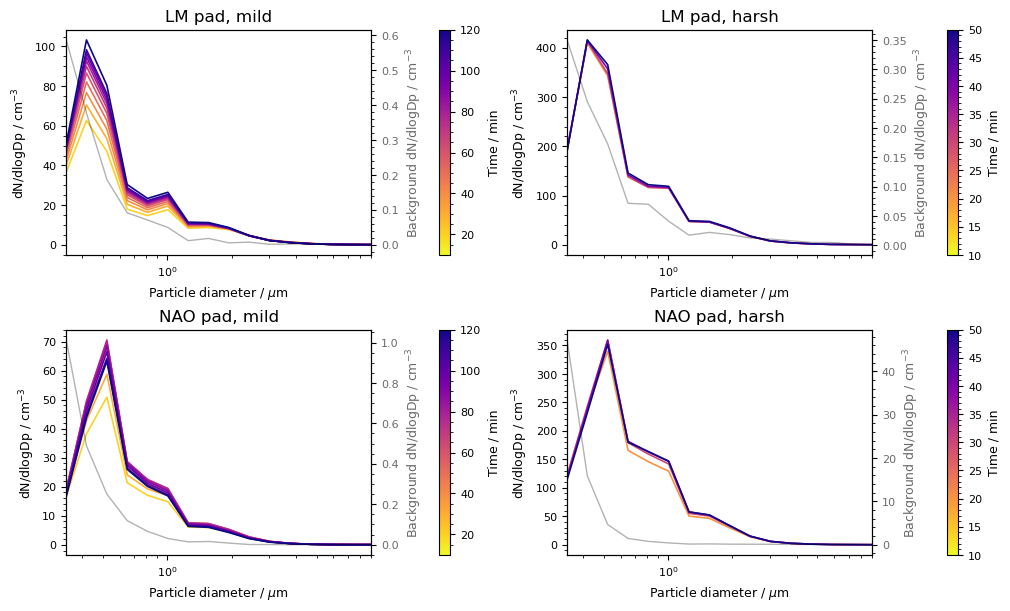

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, OPS_running_number[key], OPS_mid_point, OPS_cut_point, ax_labels[:2], 10, True)

    ax.set_title(titles[i])

fig.savefig('Running_mean/OPS_running_number.pdf', dpi=600)

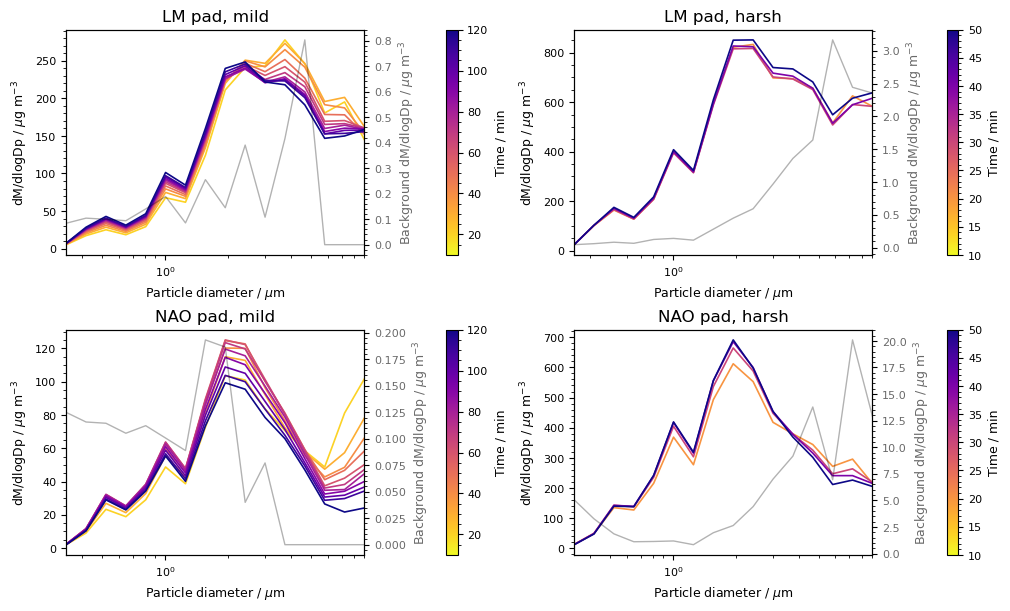

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, OPS_running_mass[key], OPS_mid_point, OPS_cut_point, [ax_labels[0], ax_labels[2]], 10, True)

    ax.set_title(titles[i])

fig.savefig('Running_mean/OPS_running_mass.pdf', dpi = 600)

In [8]:
NanoScan_dict_keys = ['2024-10-16_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan', '2024-10-17_NanoScan']
NanoScan_bin_mean = []
for key in SMPS['2024-10-16_NanoScan'].keys()[3:16]:
    NanoScan_bin_mean.append(float(key) / 1000)
NanoScan_Bins = SMPS['2024-10-16_NanoScan'].keys()[3:16].to_list()
NS_cut_point = bin_edges(0.010, NanoScan_bin_mean)

NanoScan_running = {}
for i, key in enumerate(NanoScan_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], SMPS[key], NanoScan_Bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = NanoScan_Bins
    exp_number = running_mean(SMPS[key], None, NanoScan_Bins, 'Time', '10T', 10, timestamps_exp[i])
    NanoScan_running[new_key] = pd.concat([bg_number, exp_number]).T

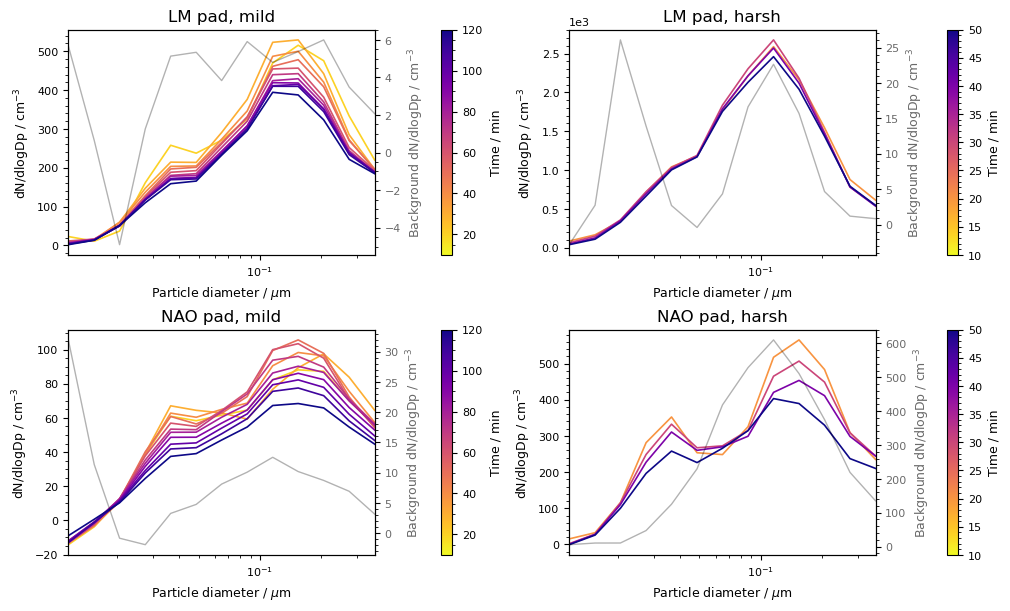

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, NanoScan_running[key], NanoScan_bin_mean, NS_cut_point, ax_labels[:2], 10, True)

    ax.set_title(titles[i])

fig.savefig('Running_mean/NanoScan_running.pdf', dpi = 600)

In [10]:
APS_running_number = {}
APS_running_mass = {}
for i, key in enumerate(APS_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], OPS_APS[key], APS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = APS_bins
    exp_number = running_mean(OPS_APS[key], None, APS_bins, 'Time', '10T', 10, timestamps_exp[i])
    APS_running_number[new_key] = pd.concat([bg_number, exp_number]).T
    mean_mass, std, errors = bin_mean(timestamps_BG_before[i], APS_mass_conc[OPS_dict_keys[i]], APS_bins, 'Time', None)
    bg_mass = pd.DataFrame({'Background': mean_mass}).T
    bg_mass.columns = APS_bins
    exp_mass = running_mean(APS_mass_conc[OPS_dict_keys[i]], None, APS_bins, 'Time', '10T', 10, timestamps_exp[i])
    APS_running_mass[new_key] = pd.concat([bg_mass, exp_mass]).T

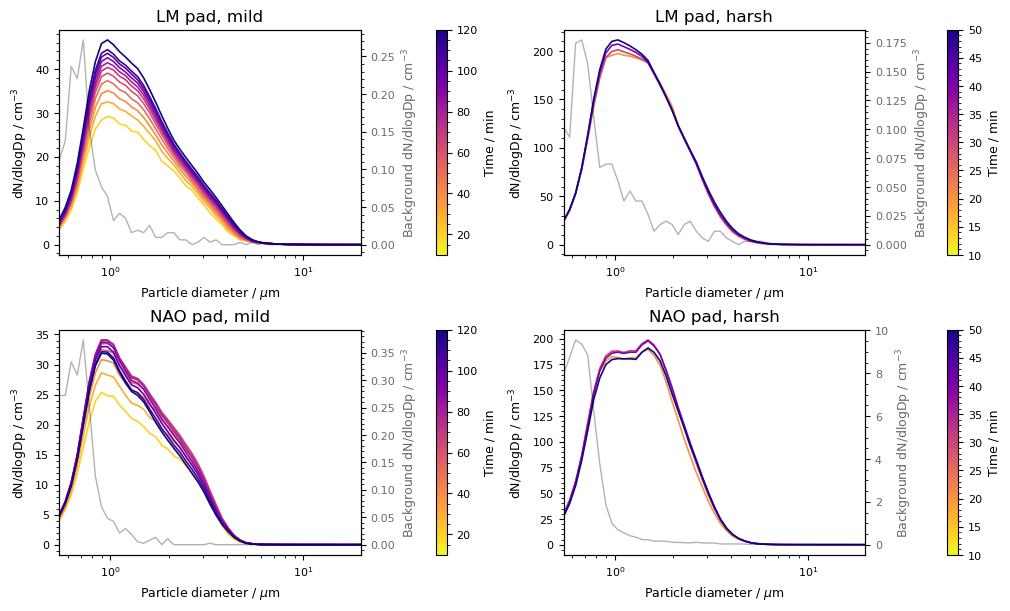

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, APS_running_number[key], APS_bin_mean, None, ax_labels[:2], 10, True)

    ax.set_title(titles[i])

fig.savefig('Running_mean/APS_running_number.pdf', dpi = 600)

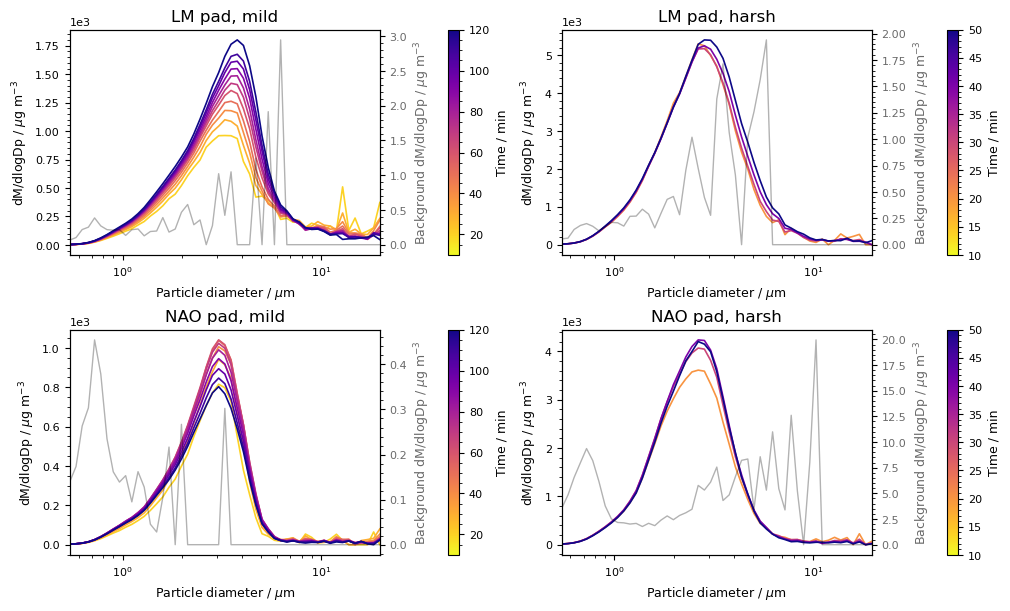

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, APS_running_mass[key], APS_bin_mean, None, [ax_labels[0], ax_labels[2]], 10, True)

    ax.set_title(titles[i])

fig.savefig('Running_mean/APS_running_mass.pdf', dpi = 600)

In [13]:
SMPS_dict_keys = ['20241016_SMPS', '20241016_SMPS_2_exp', '20241017_SMPS', '20241017_SMPS']
SMPS_bins = SMPS['20241016_SMPS'].keys()[4:117].to_list()
SMPS_bin_mean = []
for key in SMPS['20241016_SMPS'].keys()[4:117]:
    SMPS_bin_mean.append(float(key) / 1000)
SMPS_cut_point = bin_edges(0.010, SMPS_bin_mean)

SMPS_running = {}
for i, key in enumerate(SMPS_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], SMPS[key], SMPS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = SMPS_bins
    exp_number = running_mean(SMPS[key], None, SMPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    SMPS_running[new_key] = pd.concat([bg_number, exp_number]).T

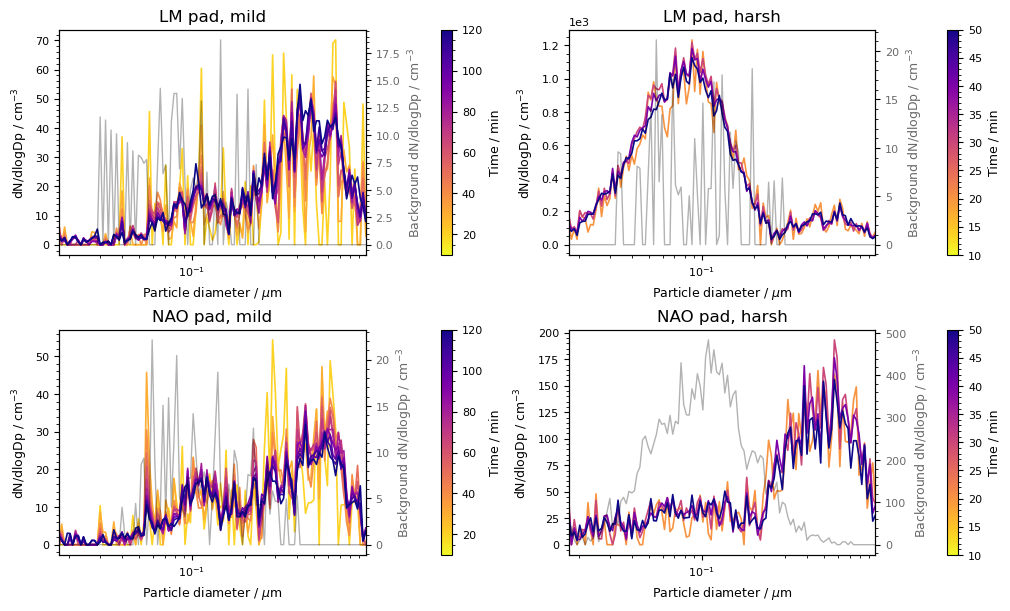

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(fig, ax, SMPS_running[key], SMPS_bin_mean, None, ax_labels[:2], 10, True)

    ax.set_title(titles[i])

fig.savefig('Running_mean/SMPS_running.pdf', dpi = 600)

In [15]:
timestamps = [timestamps_BG_before, timestamps_increase, timestamps_exp]
sizes = ['1 um', '2.5 um', '4 um', '10 um']
OPS_cut_point = [7, 11, 13, 17]

OPS_binned_number, OPS_binned_mass = binned_mean(timestamps, OPS_APS, OPS_mass_conc, OPS_dict_keys, sizes, [1, 1], OPS_cut_point, 'Time', True)

for key in OPS_dict_keys:
    OPS_binned_number[key]['2.5/10'] = OPS_binned_number[key]['2.5 um'] / OPS_binned_number[key]['10 um']
    OPS_binned_number[key]['1/10'] = OPS_binned_number[key]['1 um'] / OPS_binned_number[key]['10 um']
    OPS_binned_number[key].to_csv(key + '_number_OPS.csv')
    print(key, ' number')
    display(OPS_binned_number[key])
    OPS_binned_mass[key]['2.5/10'] = OPS_binned_mass[key]['2.5 um'] / OPS_binned_mass[key]['10 um']
    OPS_binned_mass[key]['1/10'] = OPS_binned_mass[key]['1 um'] / OPS_binned_mass[key]['10 um']
    OPS_binned_mass[key].to_csv(key + '_mass_OPS.csv')
    print(key, ' mass')
    display(OPS_binned_mass[key])

Exp1  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.129777,0.133776,0.134076,0.134276,0.996277,0.966493
Increase,6.228450,7.076335,7.197446,7.248330,0.976271,0.859294
2024-10-16 10:40:00,18.717572,21.503736,21.862769,21.965381,0.978983,0.852140
2024-10-16 10:50:00,20.972046,23.933103,24.293183,24.398884,0.980910,0.859549
2024-10-16 11:00:00,22.666988,25.695510,26.047162,26.149859,0.982625,0.866811
2024-10-16 11:10:00,24.140056,27.220283,27.559703,27.656431,0.984230,0.872855
2024-10-16 11:20:00,25.362235,28.495837,28.826047,28.920065,0.985331,0.876977
2024-10-16 11:30:00,26.260250,29.421983,29.743455,29.835112,0.986153,0.880179
2024-10-16 11:40:00,26.975657,30.164175,30.479576,30.568631,0.986769,0.882462
2024-10-16 11:50:00,27.553980,30.782697,31.096156,31.183589,0.987144,0.883605


Exp1  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.067607,0.150985,0.200822,0.277236,0.544609,0.243862
Increase,4.875113,23.695087,40.455119,81.859558,0.289460,0.059555
2024-10-16 10:40:00,15.513476,76.292990,125.858485,198.789257,0.383788,0.078040
2024-10-16 10:50:00,17.312371,81.227160,130.692856,207.349430,0.391740,0.083494
2024-10-16 11:00:00,18.618789,83.283208,131.498086,205.130990,0.406000,0.090765
2024-10-16 11:10:00,19.737612,84.778257,131.133689,201.131063,0.421508,0.098133
2024-10-16 11:20:00,20.696025,86.125656,131.101464,199.809068,0.431040,0.103579
2024-10-16 11:30:00,21.377009,86.895741,130.613217,197.927057,0.439029,0.108004
2024-10-16 11:40:00,21.963273,87.663075,130.499675,196.286203,0.446608,0.111894
2024-10-16 11:50:00,22.454286,88.791340,131.315731,196.086921,0.452816,0.114512


Exp2  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.090530,0.097165,0.098892,0.100073,0.970935,0.904632
Increase,27.069765,30.170878,30.458102,30.555387,0.987416,0.885924
2024-10-16 15:00:00,125.325917,139.134015,140.226428,140.551697,0.989913,0.891671
2024-10-16 15:10:00,125.786722,139.439512,140.535235,140.855020,0.989951,0.893023
2024-10-16 15:20:00,127.467277,141.255846,142.373557,142.696996,0.989901,0.893272
2024-10-16 15:30:00,129.124431,143.270410,144.427138,144.765384,0.989673,0.891957


Exp2  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.049526,0.186427,0.407977,1.321926,0.141026,0.037465
Increase,21.002451,77.000424,112.389957,179.675450,0.428553,0.116891
2024-10-16 15:00:00,97.743753,342.538769,475.130048,701.834625,0.488062,0.139269
2024-10-16 15:10:00,97.453068,338.980386,471.815135,693.819665,0.488571,0.140459
2024-10-16 15:20:00,99.126828,343.115393,478.498378,704.711812,0.486888,0.140663
2024-10-16 15:30:00,101.144799,352.164858,492.487152,728.978078,0.483094,0.138749


Exp3  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.187552,0.191218,0.191301,0.191301,0.999564,0.980401
Increase,3.996522,4.417046,4.457596,4.486020,0.984625,0.890884
2024-10-17 10:20:00,15.100430,16.871709,17.001581,17.036279,0.990340,0.886369
2024-10-17 10:30:00,17.050969,19.021659,19.161723,19.193174,0.991064,0.888387
2024-10-17 10:40:00,18.347435,20.432992,20.579889,20.608856,0.991467,0.890269
2024-10-17 10:50:00,19.256490,21.413099,21.566705,21.595987,0.991531,0.891670
2024-10-17 11:00:00,19.798254,21.970951,22.125504,22.153588,0.991756,0.893682
2024-10-17 11:10:00,19.926573,22.075850,22.229506,22.256640,0.991877,0.895309
2024-10-17 11:20:00,19.708974,21.802814,21.951993,21.978061,0.992026,0.896757
2024-10-17 11:30:00,19.276659,21.291974,21.434529,21.459282,0.992203,0.898290


Exp3  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.064089,0.112510,0.119857,0.119857,0.938705,0.534716
Increase,3.031197,10.166165,15.029257,43.687208,0.232703,0.069384
2024-10-17 10:20:00,12.464309,42.553092,57.241400,84.869808,0.501393,0.146864
2024-10-17 10:30:00,14.160869,47.673686,63.340067,86.251584,0.552728,0.164181
2024-10-17 10:40:00,15.264358,50.685027,67.145391,87.431559,0.579711,0.174586
2024-10-17 10:50:00,16.029062,52.560934,69.827982,89.370128,0.588126,0.179356
2024-10-17 11:00:00,16.451036,53.118078,70.437978,88.418786,0.600756,0.186058
2024-10-17 11:10:00,16.538726,52.678363,69.917816,87.017882,0.605374,0.190061
2024-10-17 11:20:00,16.338196,51.421225,68.184906,84.455776,0.608854,0.193453
2024-10-17 11:30:00,15.959886,49.608712,65.633960,80.916713,0.613084,0.197238


Exp4  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,6.717858,6.772595,6.787205,6.795411,0.996642,0.988587
Increase,47.284660,52.968850,53.367198,53.505846,0.989964,0.883729
2024-10-17 14:30:00,108.595121,121.958872,122.723337,122.921858,0.992166,0.883448
2024-10-17 14:40:00,114.475776,129.009586,129.809985,129.995393,0.992417,0.880614
2024-10-17 14:50:00,114.618498,129.654308,130.461623,130.640436,0.992452,0.877359
2024-10-17 15:00:00,113.027899,128.148811,128.951782,129.119061,0.992486,0.875377


Exp4  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,1.295176,2.232522,3.770394,8.883583,0.251309,0.145794
Increase,35.315481,115.698530,155.988831,237.315776,0.487530,0.148812
2024-10-17 14:30:00,86.463605,270.714791,346.620394,453.869287,0.596460,0.190503
2024-10-17 14:40:00,93.590556,292.810247,371.365228,471.896823,0.620496,0.198328
2024-10-17 14:50:00,95.333290,300.580453,379.706569,476.144232,0.631280,0.200219
2024-10-17 15:00:00,95.068631,301.111113,379.469162,469.437331,0.641430,0.202516


In [16]:
timestamps = [timestamps_BG_before, timestamps_increase, timestamps_exp]
APS_cut_point = [11, 23, 30, 42]
sizes = ['1 um', '2.5 um', '4 um', '10 um']

APS_binned_number, APS_binned_mass = binned_mean(timestamps, OPS_APS, APS_mass_conc, APS_dict_keys, sizes, [2, 2], APS_cut_point, 'Time', True)

for i, key in enumerate(OPS_dict_keys):
    APS_binned_number[key]['2.5/10'] = APS_binned_number[key]['2.5 um'] / APS_binned_number[key]['10 um']
    APS_binned_number[key]['1/10'] = APS_binned_number[key]['1 um'] / APS_binned_number[key]['10 um']
    APS_binned_number[key].to_csv(key + '_number_APS.csv')
    print('Exp', i+1, ' number')
    display(APS_binned_number[key])
    APS_binned_mass[key]['2.5/10'] = APS_binned_mass[key]['2.5 um'] / APS_binned_mass[key]['10 um']
    APS_binned_mass[key]['1/10'] = APS_binned_mass[key]['1 um'] / APS_binned_mass[key]['10 um']
    APS_binned_mass[key].to_csv(key + '_number_APS.csv')
    print('Exp', i+1, ' mass')
    display(APS_binned_mass[key])

KeyError: '20241016_APS_dndlogdp'